In [ ]:
!pip install tf-explain

     |████████████████████████████████| 51kB 3.1MB/s 


In [ ]:
import cv2
import os
import math
import pylab
import seaborn as sns
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Flatten, Dense, Conv2D, GlobalAveragePooling2D, MaxPool2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from google.colab.patches import cv2_imshow
from tf_explain.core.grad_cam import GradCAM
from random import choice

In [ ]:
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') >= 0.95:
            # print('inside if')
            self.model.stop_training = True

early_stopping = EarlyStopping(
    monitor="val_accuracy", 
    patience=20,
    mode="auto",
    min_delta=0
)

filepath = '/content/drive/MyDrive/ModelResults/improv-custom-model-realworldaug.h5'
checkpoint = ModelCheckpoint(
    filepath=filepath,
    monitor='val_accuracy',
    verbose=0,
    save_best_only=True,
    mode='max'
)

callback = MyCallback()

In [ ]:
# Load the dataset
dataset_path = '/content/drive/MyDrive/Dataset/PlantVillageDataset'
train_path = os.path.join(dataset_path, 'Train')
validate_path = os.path.join(dataset_path, 'Validation')
batch_size = 64

# Training
train_datagen = ImageDataGenerator(
    rescale=1./255
)

train_datagenerator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=batch_size
)

# Validation
validate_datagen = ImageDataGenerator(
    rescale=1./255,
)

validate_datagenerator = validate_datagen.flow_from_directory(
    validate_path,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=batch_size
)


Found 12019 images belonging to 10 classes.
Found 3858 images belonging to 10 classes.


In [ ]:
model = Sequential([
    Conv2D(64, (7, 7), input_shape=(224, 224, 3), strides=2, name='block1_conv1'),
    MaxPool2D((3, 3), strides=2),
    Conv2D(64, (3, 3), activation='relu', name='block2_conv1', padding='same'),
    Conv2D(64, (3, 3), activation='relu', name='block2_conv2', padding='same'),
    Conv2D(64, (3, 3), activation='relu', name='block2_conv3', padding='same'),
    Conv2D(64, (3, 3), activation='relu', name='block2_conv4', padding='same'),
    MaxPool2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu', name='block3_conv1', padding='same'),
    Conv2D(128, (3, 3), activation='relu', name='block3_conv2', padding='same'),
    Conv2D(128, (3, 3), activation='relu', name='block3_conv3', padding='same'),
    Conv2D(128, (3, 3), activation='relu', name='block3_conv4', padding='same'),
    Conv2D(128, (3, 3), activation='relu', name='block3_conv5', padding='same'),
    Conv2D(128, (3, 3), activation='relu', name='block3_conv6', padding='same'),
    MaxPool2D((2, 2)),
    Conv2D(256, (3, 3), activation='relu', name='block4_conv1', padding='same'),
    Conv2D(256, (3, 3), activation='relu', name='block4_conv2', padding='same'),
    Conv2D(256, (3, 3), activation='relu', name='block4_conv3', padding='same'),
    Conv2D(256, (3, 3), activation='relu', name='block4_conv4', padding='same'),
    Conv2D(256, (3, 3), activation='relu', name='block4_conv5', padding='same'),
    Conv2D(256, (3, 3), activation='relu', name='block4_conv6', padding='same'),
    Conv2D(256, (3, 3), activation='relu', name='block4_conv7', padding='same'),
    Conv2D(256, (3, 3), activation='relu', name='block4_conv8', padding='same'),
    MaxPool2D((2, 2)),
    Conv2D(512, (3, 3), activation='relu', name='block5_conv1', padding='same'),
    Conv2D(512, (3, 3), activation='relu', name='block5_conv2', padding='same'),
    Conv2D(512, (3, 3), activation='relu', name='block5_conv3', padding='same'),
    Conv2D(512, (3, 3), activation='relu', name='block5_conv4', padding='same'),
    Conv2D(512, (3, 3), activation='relu', name='block5_conv5', padding='same'),
    Conv2D(512, (3, 3), activation='relu', name='block5_conv6', padding='same'),
    GlobalAveragePooling2D(),
    Flatten(),
    Dense(10, activation='softmax'),  
])

In [ ]:
model.compile(
    optimizer=Adam(0.0001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history = model.fit(
    train_datagenerator, 
    epochs=500, 
    steps_per_epoch=len(train_datagenerator), 
    validation_data=validate_datagenerator,
    validation_steps=len(validate_datagenerator),
    callbacks=[callback, early_stopping, checkpoint]
)

Epoch 1/500
94/94 [==============================] - 5152s 55s/step - loss: 2.1827 - accuracy: 0.2432 - val_loss: 1.8073 - val_accuracy: 0.3950
Epoch 2/500
94/94 [==============================] - 55s 586ms/step - loss: 1.7775 - accuracy: 0.3372 - val_loss: 1.4134 - val_accuracy: 0.4870
Epoch 3/500
94/94 [==============================] - 55s 579ms/step - loss: 1.5710 - accuracy: 0.3994 - val_loss: 1.1546 - val_accuracy: 0.5946
Epoch 4/500
94/94 [==============================] - 54s 577ms/step - loss: 1.2619 - accuracy: 0.5277 - val_loss: 0.9864 - val_accuracy: 0.6348
Epoch 5/500
94/94 [==============================] - 54s 576ms/step - loss: 1.1019 - accuracy: 0.5927 - val_loss: 0.9043 - val_accuracy: 0.6887
Epoch 6/500
94/94 [==============================] - 56s 590ms/step - loss: 0.9385 - accuracy: 0.6580 - val_loss: 0.6546 - val_accuracy: 0.7646
Epoch 7/500
94/94 [==============================] - 56s 593ms/step - loss: 0.7687 - accuracy: 0.7303 - val_loss: 0.5899 - val_accuracy:

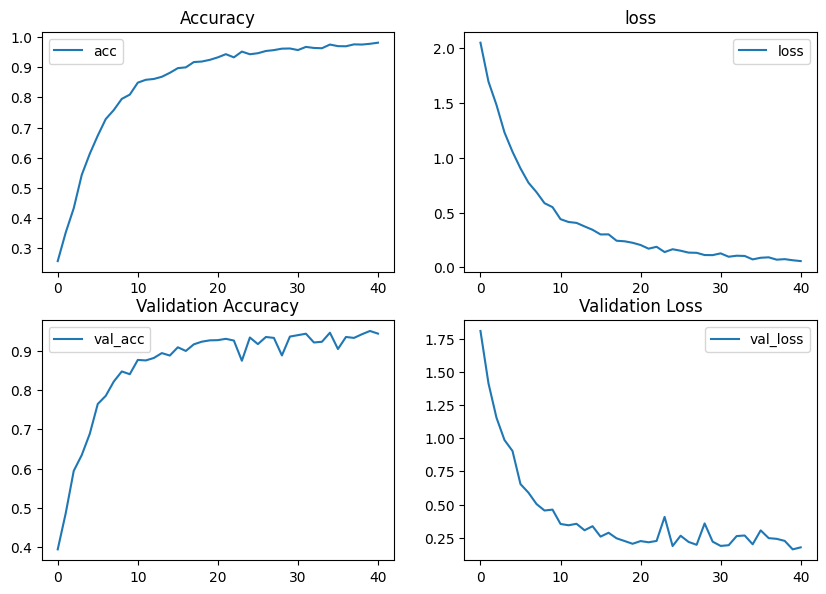

In [ ]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.rcParams['figure.dpi'] = 100

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
x = range(len(acc))

fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(x, acc, label='acc')
axs[0, 0].set_title('Accuracy')
axs[0, 0].legend()

axs[0, 1].plot(x, loss, label='loss')
axs[0, 1].set_title('loss')
axs[0, 1].legend()

axs[1, 0].plot(x, val_acc, label='val_acc')
axs[1, 0].set_title('Validation Accuracy')
axs[1, 0].legend()

axs[1, 1].plot(x, val_loss, label='val_loss')
axs[1, 1].set_title('Validation Loss')
axs[1, 1].legend()
plt.show()

In [ ]:
model = load_model('/content/drive/MyDrive/CustomModelResults/ModelResults/custom-model.h5')

In [ ]:
test_data_path = os.path.join(dataset_path, 'Test')
 
test_datagen = ImageDataGenerator(
    rescale=1./255,
)
test_datagenerator = test_datagen.flow_from_directory(
    test_data_path,
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=64
)

Found 2293 images belonging to 10 classes.


In [ ]:
predictions = model.evaluate(test_datagenerator)
print('Loss:', round(predictions[0], 4))
print('Accuracy:', round(predictions[1], 4))

18/18 [==============================] - 579s 34s/step - loss: 0.1730 - accuracy: 0.9472
Loss: 0.173
Accuracy: 0.9472


In [ ]:
classes = {v: k for k, v in test_datagenerator.class_indices.items()}

In [ ]:
conv_layers = [layer.name for layer in model.layers if layer.name.__contains__('conv')]

In [ ]:
gradcam = GradCAM()

In [ ]:
class_path = os.path.join(test_data_path, choice(os.listdir(test_data_path)))
image_path = os.path.join(class_path, choice(os.listdir(class_path)))
print(f"Class Name: {class_path.split('/')[-1]} | File Name: {image_path.split('/')[-1]}")

image = load_img(image_path, target_size=(224, 224))
image_a = img_to_array(image)
image_p = image_a.reshape((1, image_a.shape[0], image_a.shape[1], image_a.shape[2]))
yhat = np.argmax(model.predict(image_p))
# ans = classes[yhat]
# print('Class Predicted:', ans)

Class Name: Tomato___Late_blight | File Name: 1 (1781).JPG


Total: 25 | Columns: 5 | Rows: 5 | Remaining: 0


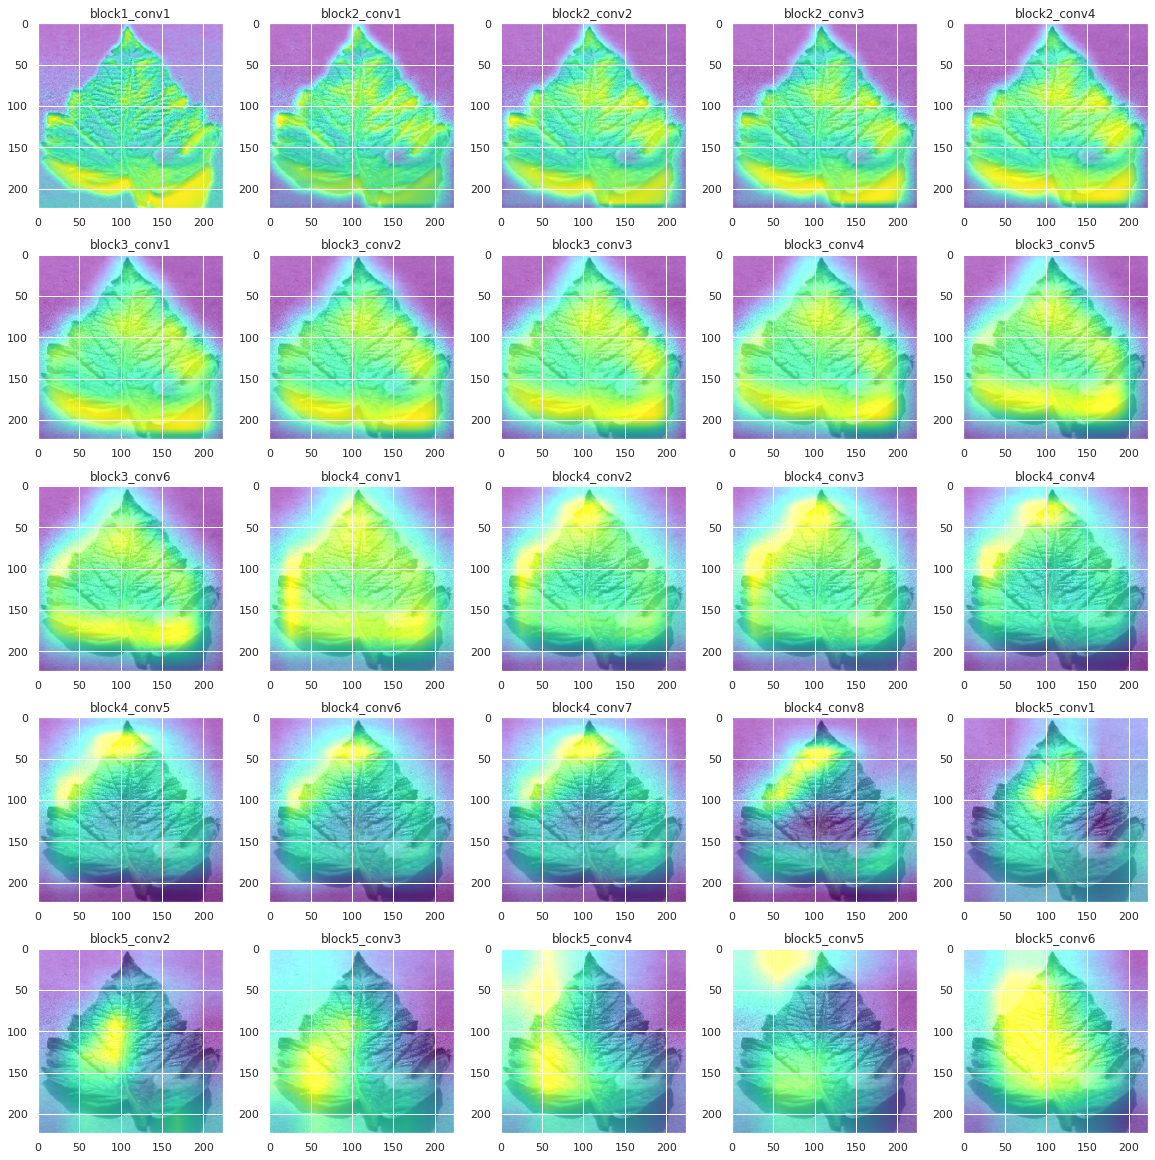

In [ ]:
# cv2_imshow(image_a)

total = len(conv_layers)
columns = 5
rows = total // columns
remaining = total - rows * columns
print(f"Total: {total} | Columns: {columns} | Rows: {rows} | Remaining: {remaining}")

img = tf.keras.applications.xception.preprocess_input(img_to_array(image))
# img = img_to_array(image)

sns.set()
if remaining > 0:
    fig, axs = plt.subplots(rows + 1, columns, constrained_layout=True, figsize=(16, 16))
else:
    fig, axs = plt.subplots(rows, columns, constrained_layout=True, figsize=(16, 16))

i = 0
j = 0
for layer_name in conv_layers:
    # print(i, j, end='\t')
    axs[i, j].imshow(gradcam.explain(([img], None), model, yhat, layer_name))
    axs[i, j].set_title(layer_name)
    j += 1
    if j % columns == 0:
        j = 0
        i += 1
        # print()

# plt.imshow(gradcam.explain(([img], None), model, yhat, conv_layers[11]))
